# House Pricing

### Importarlibrerias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Cargar datos

In [6]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explorar datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Eliminando columnas con gran cantidad de nulos

data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [6]:
data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.describe(include = ['O'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


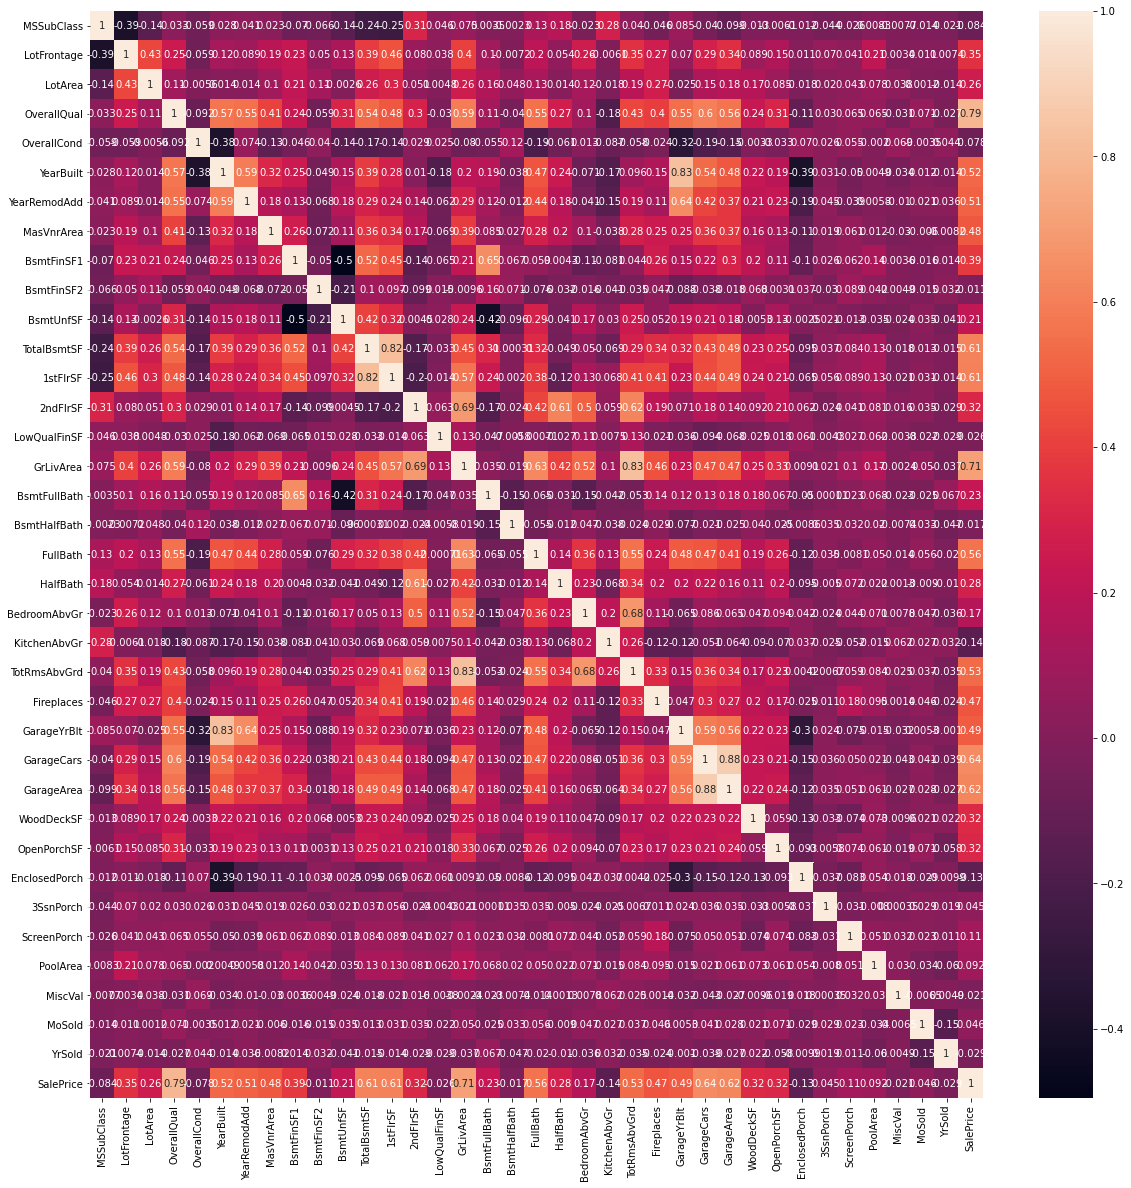

In [8]:
correlations = data.corr()
f, ax = plt.subplots( figsize = ( 20, 20 ) ) #Donde hay 1 son las variables con mayor correlacion
sns.heatmap( correlations, annot = True )
plt.show()

In [10]:
# Elimminando columnas (redundantes) con gran correlacion
data.drop(['GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'WoodDeckSF', 'GrLivArea'], inplace = True, axis = 1)

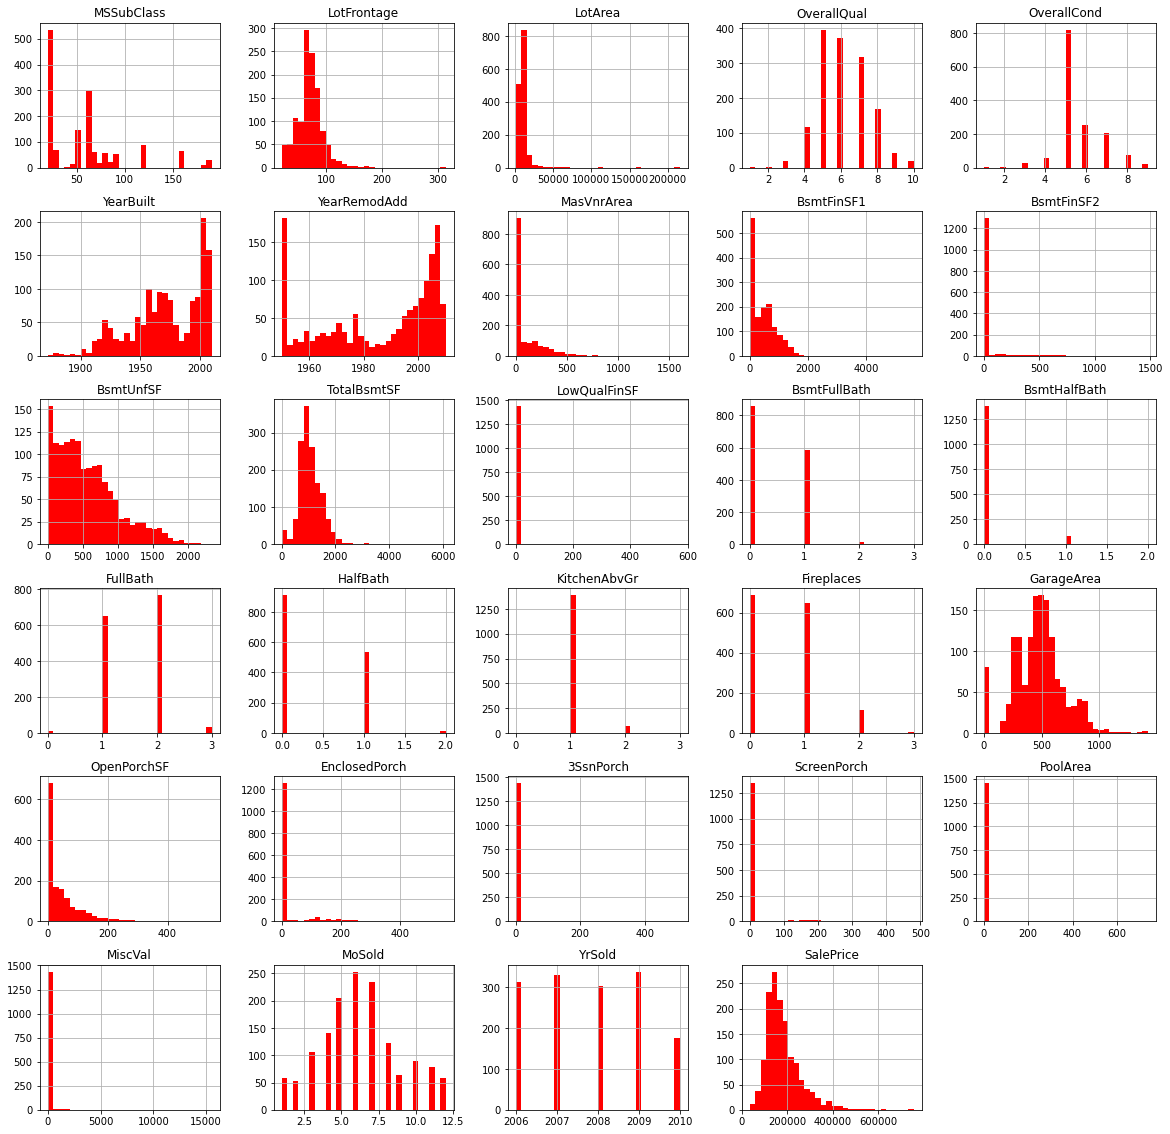

In [11]:
data.hist( bins = 30, figsize=(20,20), color='r')
plt.show()


In [13]:
# Eliminando columnas con unicos datos
data.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2'], inplace = True, axis = 1)

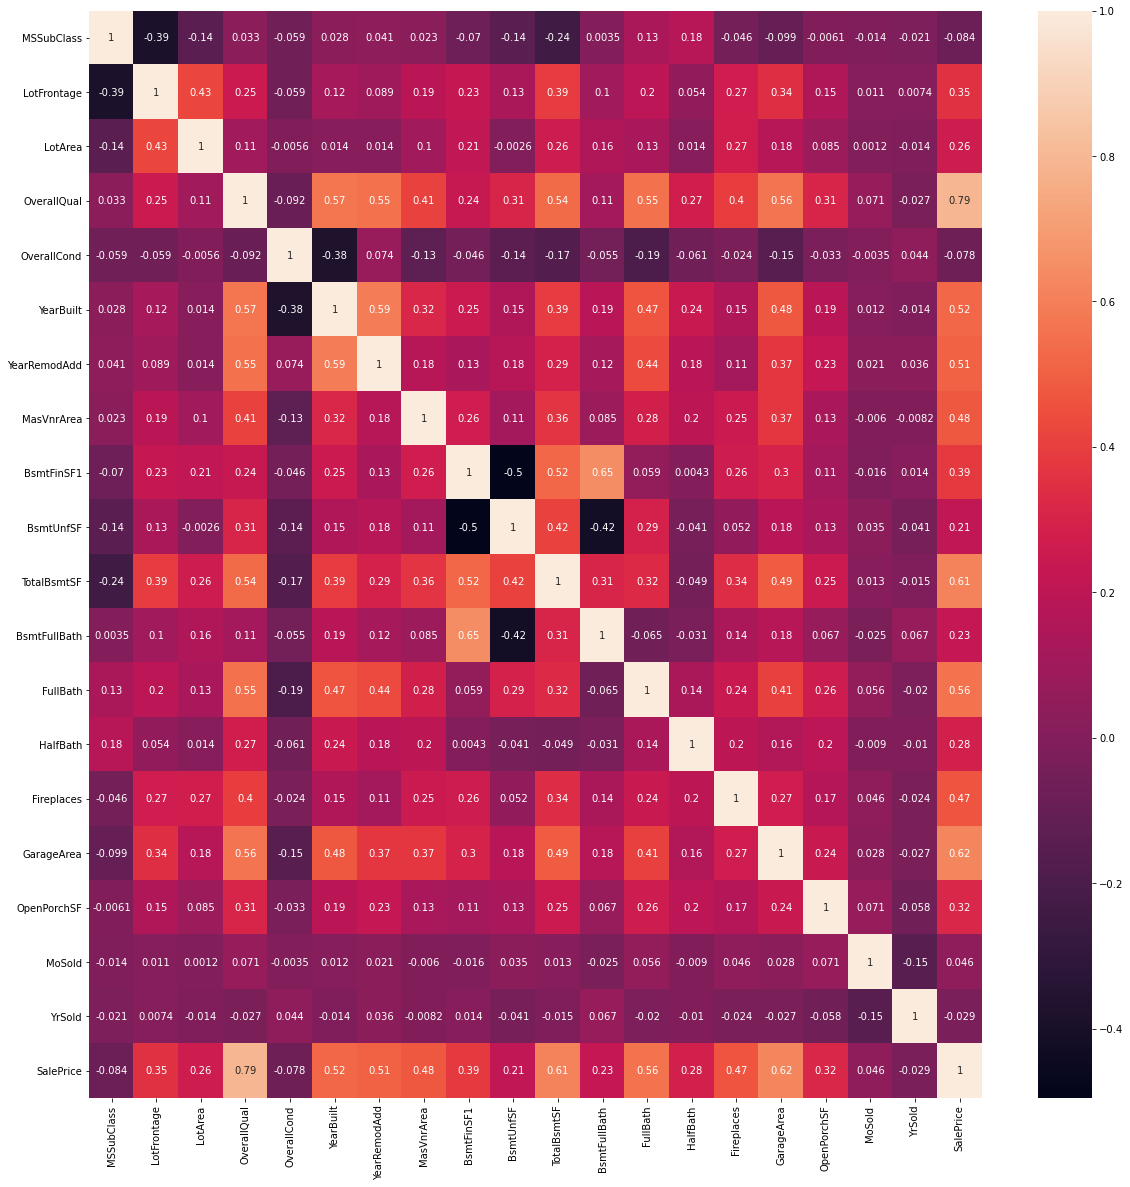

In [14]:
correlations = data.corr()
f, ax = plt.subplots( figsize = ( 20, 20 ) ) #Donde hay 1 son las variables con mayor correlacion
sns.heatmap( correlations, annot = True )
plt.show()

### Seleccionando columnas que se usarán en el modelo

In [7]:
features = ['OverallQual', 'YearBuilt', 'FullBath', 'GarageArea', 'TotalBsmtSF']
target = ['SalePrice']

In [17]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   YearBuilt    1460 non-null   int64
 2   FullBath     1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   TotalBsmtSF  1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [18]:
data[target].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [19]:
data[features].describe()

,OverallQual,YearBuilt,FullBath,GarageArea,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1.565068,472.980137,1057.429452
std,1.382997,30.202904,0.550916,213.804841,438.705324
min,1.000000,1872.000000,0.000000,0.000000,0.000000
25%,5.000000,1954.000000,1.000000,334.500000,795.750000
50%,6.000000,1973.000000,2.000000,480.000000,991.500000
75%,7.000000,2000.000000,2.000000,576.000000,1298.250000
max,10.000000,2010.000000,3.000000,1418.000000,6110.000000


In [20]:
data.shape

(1460, 58)

## Diviendo conjunto de datos

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform( X )

array([[ 0.65147924,  1.05099379,  0.78974052,  0.35100032, -0.45930254],
       [-0.07183611,  0.15673371,  0.78974052, -0.06073101,  0.46646492],
       [ 0.65147924,  0.9847523 ,  0.78974052,  0.63172623, -0.31336875],
       ...,
       [ 0.65147924, -1.00249232,  0.78974052, -1.03391416,  0.21564122],
       [-0.79515147, -0.70440562, -1.02604084, -1.09005935,  0.04690528],
       [-0.79515147, -0.20759447, -1.02604084, -0.9216238 ,  0.45278362]])

In [8]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

### Probando regresión lineal

In [41]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.7083147260432001

In [39]:
lm.score(X_dev, y_dev)

0.7390532886715337

### Probando regresión polinómica

In [69]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
lin2.score(X_poly, y_train)

0.8069344908881233

In [53]:

X_dev_poly = poly.fit_transform(X_dev)
 
poly.fit(X_dev_poly, y_train)
lin2.score(X_dev_poly, y_dev)

0.8024393100969174

### Enviando primer intento
#### Se hicieron predicciones sobre el conjunto test

In [76]:
test = pd.read_csv('test.csv')


In [64]:

test[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   YearBuilt    1459 non-null   int64  
 2   FullBath     1459 non-null   int64  
 3   GarageArea   1458 non-null   float64
 4   TotalBsmtSF  1458 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 57.1 KB


In [79]:

for column in features:
    test[column].fillna(test[column].mean(), inplace = True)
test[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   YearBuilt    1459 non-null   int64  
 2   FullBath     1459 non-null   int64  
 3   GarageArea   1459 non-null   float64
 4   TotalBsmtSF  1459 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 57.1 KB


In [84]:

test_poly = poly.fit_transform(test[features])
 
y_pred = lin2.predict(test_poly)


y_pred = y_pred.reshape(1,1459)[0]
y_pred

array([132222.52033046, 168169.19424942, 160191.8989301 , ...,
       153728.77545276,  98338.62862748, 223031.03145573])

### Función para generar archivo

In [83]:
# para descargar en ordenador
def download_output(y_pred, name):
    output = pd.DataFrame({'Id': test.Id,
                            'SalePrice': y_pred})
    output.to_csv(name, index = False)

In [85]:
download_output(y_pred, 'HousePricing')

In [36]:
y_train.values

array([[145000],
       [178000],
       [ 85000],
       ...,
       [115000],
       [189950],
       [174000]], dtype=int64)

## Probando Gradient Boosting Regressor


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [52]:
y_train['SalePrice'].values

array([145000, 178000,  85000, ..., 115000, 189950, 174000], dtype=int64)

In [53]:
est = GradientBoostingRegressor(
     n_estimators=2000,  max_depth=1).fit(X_train, y_train['SalePrice'].values)


In [54]:
est.score(X_dev, y_dev)

0.8352637597436032

### Probando distintos parametros

In [64]:
cmd = GradientBoostingRegressor(
     n_estimators=2000,  max_depth=1, random_state=0, learning_rate = 0.1, loss = 'ls', min_samples_split = 2)


In [61]:


cmd.score(X_dev, y_dev)

0.8374351465816131

### Usando GridSearchCV para encontrar los mejores parametros

In [62]:
params = {'n_estimators': [1000, 2000, 4000], 'max_depth': [1 ,3 ,5], 'learning_rate': [0.01, 0.1, 0.001]}

In [65]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(cmd, params)

In [66]:
clf.fit(X_train, y_train['SalePrice'].values)

GridSearchCV(estimator=GradientBoostingRegressor(max_depth=1, n_estimators=2000,
                                                 random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.001],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [1000, 2000, 4000]})

In [67]:
clf.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 4000}

### Entrenando modelo con los parametros encontrados

In [68]:
best = GradientBoostingRegressor(
     n_estimators=4000,  max_depth=3, random_state=0, learning_rate = 0.001, loss = 'ls', min_samples_split = 2)

In [71]:
best.fit(X, y['SalePrice'].values)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=4000,
                          random_state=0)

### Predicciones

In [85]:
y_pred = best.predict(test[features])

In [86]:
download_output(y_pred, 'HousePricing1')